## Principal Component Analysis and Clustering of Radar Data based on Morphological Parameters
This program acceps a CSV file containing radar files with associated shape parameters. The program then performs principal component analysis to reduce the dimensionality of the dataset and clusters the data based on their similar shape characteristics. The program also creates a correlation matrix to visualize the relationship between the shape parameters.

#### Author
<b>Maggie Zoerner</b></br>
Argonne National Laboratory, <i>Environmental Science Division</i></br>
Student Undergraduate Laboratory Intern </br>

#### Import the libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import TwoSlopeNorm

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

#### Read in the file

In [2]:
df = pd.read_csv("parameter_computations.csv")
df

,File Name,Area,Perimeter,Center of Mass (X),Center of Mass (Y),Skewness (X),Skewness (Y),Elongation,Equivalent Diameter,Compactness,Roundness,Eccentricity,Deviation from Circle
0,season_grids\KILX20200601_171444_V06.nc,152.5,109.296463,96,280,-0.023510,0.004469,1.250000,13.934455,6.233508,0.160423,1.237183,0.043546
1,season_grids\KILX20200601_171922_V06.nc,192.0,115.195958,101,279,-0.029894,-0.004799,1.526316,15.635280,5.500009,0.181818,1.652990,0.022373
2,season_grids\KILX20200601_173319_V06.nc,254.5,195.178713,115,275,-0.041922,-0.013057,1.541667,18.001096,11.911522,0.083952,1.485470,0.024556
3,season_grids\KILX20200601_181948_V06.nc,172.0,101.396968,159,255,-0.031203,-0.001754,1.250000,14.798554,4.756764,0.210227,1.470806,0.036197
4,season_grids\KILX20200601_183106_V06.nc,187.0,99.882250,172,249,-0.043504,0.004506,1.705882,15.430353,4.245464,0.235546,1.857598,0.003848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,season_grids\KILX20200829_063543_V06.nc,419.5,151.923880,285,210,-0.027301,-0.000971,1.583333,23.111123,4.378348,0.228397,2.237020,0.015023
1687,season_grids\KILX20200829_065440_V06.nc,328.0,135.195958,289,200,-0.072692,-0.000646,1.545455,20.435816,4.434490,0.225505,4.179422,0.002019
1688,season_grids\KILX20200829_070346_V06.nc,199.5,123.639609,289,194,-0.109829,-0.002774,1.450000,15.937732,6.097650,0.163998,2.105569,0.023927
1689,season_grids\KILX20200831_174103_V06.nc,326.0,128.710677,10,10,0.035990,-0.001812,1.363636,20.373416,4.043912,0.247285,3.047072,0.013473


#### Normalize the data

In [3]:
scaler = StandardScaler()
x = df[['Area','Perimeter','Center of Mass (X)','Center of Mass (Y)', 'Skewness (X)',
    'Skewness (Y)','Elongation', 'Equivalent Diameter', 'Compactness', 'Roundness',
    'Eccentricity', 'Deviation from Circle']]

In [4]:
x = scaler.fit_transform(x)

#### Perform principal component analysis

In [5]:
# PCA projection to 2D

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

In [6]:
principalDf.head()

,Principal Component 1,Principal Component 2
0,-0.869689,-0.335356
1,-0.933045,-0.366956
2,0.362193,-0.234775
3,-1.154073,-0.317920
4,-1.261497,-0.366325


#### Determine the optimal number of clusters using the elbow method

In [7]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    # Generate the elbow plot
    fig = plt.subplots(figsize = (10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters', fontsize =12)
    plt.ylabel('Inertia', fontsize =12)
    plt.xticks(fontsize =12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.show()

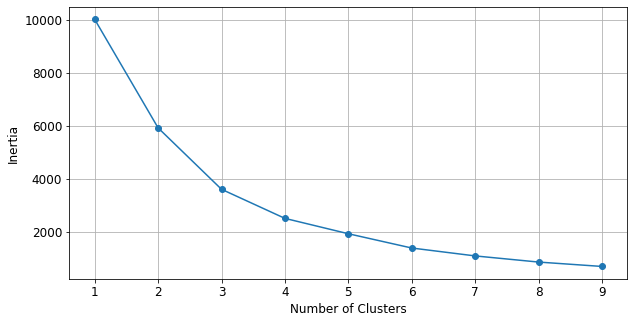

In [8]:
optimise_k_means(principalComponents, 10)

#### Create the cluster plot

In [9]:
kmeans = KMeans(n_clusters = 4).fit(principalComponents)
label = kmeans.labels_

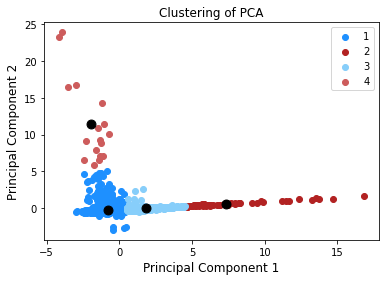

In [10]:
# Plotting with centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
colors = ['dodgerblue', 'firebrick', 'lightskyblue', 'indianred']
#plotting the results:
for i in u_labels:
    plt.scatter(principalComponents[label == i , 0] , principalComponents[label == i , 1] , label = i+1, color = colors[i])
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title("Clustering of PCA", fontsize = 12)
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.legend()
plt.show()

#### Create the Correlation Matrix

In [11]:
corrM = df.corr()

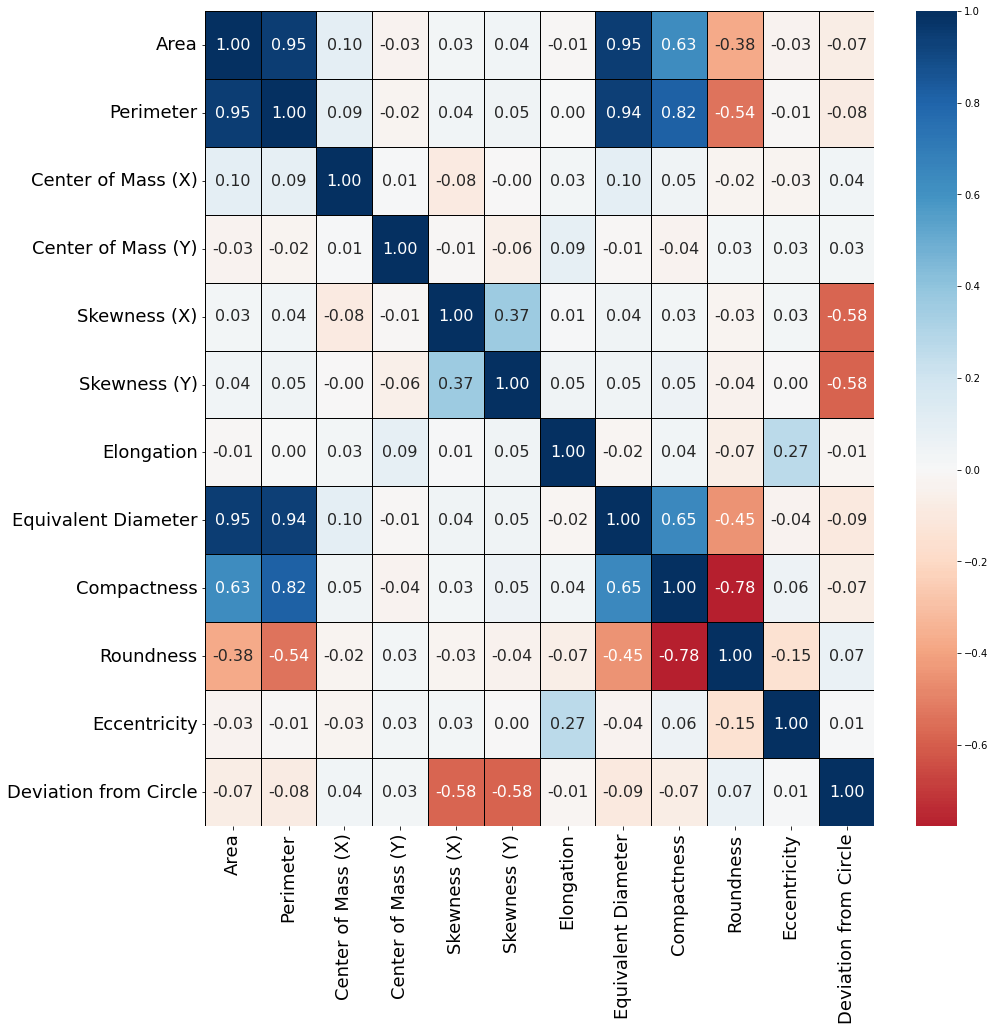

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
rdbu = sns.diverging_palette(h_neg=-1, h_pos=1, as_cmap=True)
res = sns.heatmap(corrM, cmap='RdBu', center=0.00, annot=True, fmt='.2f', 
            linewidths=1, linecolor='black', cbar=True, ax=ax, annot_kws={"size": 16})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
plt.show()